C:\Users\Ribhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Ribhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to C:\Users\Ribhu/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100.0%


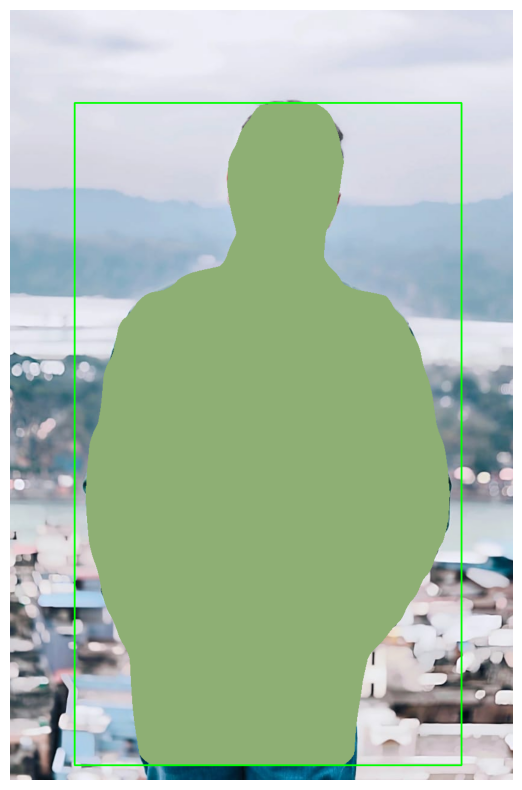

In [1]:
import torch
import torchvision
from torchvision.models.detection.mask_rcnn import MaskRCNN
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode


image_path = "ribhu.jpg"  # Change this to your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to tensor and normalize
image_tensor = torchvision.transforms.functional.to_tensor(image_rgb).unsqueeze(0)

# Perform inference
with torch.no_grad():
    outputs = model(image_tensor)

# Extract bounding boxes, labels, and masks
threshold = 0.5  # Confidence threshold
masks = outputs[0]["masks"]
scores = outputs[0]["scores"]
boxes = outputs[0]["boxes"]
labels = outputs[0]["labels"]

# Filter out low-confidence predictions
filtered_masks = []
filtered_boxes = []
filtered_labels = []

for i in range(len(scores)):
    if scores[i] > threshold:
        filtered_masks.append(masks[i, 0].mul(255).byte().cpu().numpy())  # Convert to binary mask
        filtered_boxes.append(boxes[i].cpu().numpy().astype(int))
        filtered_labels.append(labels[i].item())

# Overlay masks on the original image
for mask, box in zip(filtered_masks, filtered_boxes):
    color = np.random.randint(0, 255, (1, 3), dtype=np.uint8).tolist()[0]
    image[mask > 128] = color  # Apply mask

    # Draw bounding box
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
